In [1]:
%matplotlib inline

#import packages
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#reading in two datasets
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

print(fandango.shape)
fandango.head()

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
print(movie_ratings.shape)
movie_ratings.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
#isolating the columns that offer information about Fandango's ratings

fandango_fr = fandango[['FILM', 
                        'Fandango_Stars', 
                        'Fandango_Ratingvalue', 
                        'Fandango_votes', 
                        'Fandango_Difference']]
movie_ratings_fr = movie_ratings[['movie', 'year', 'fandango']]

## Some things to note so far:
* Population of interest: aggregated movie rating scores in Fandango
* Sampling of both datasets
    - Sampling was not random for the first dataset since the movies are only included in if they have at least 30 fan reviews on Fandango.
    - The second dataset is also not random since it chose 214 most popular movies from 2016 to 2017.
    - Because the samples were not randomly selected, they do not represent the population we're interested in. We are trying to conduct inferential statistics, so these datasets are insufficient for our analysis.

## Change of plans!
Since our datasets are limited, we will change our definition of population of interest to popular movies on Fandango in separate years of 2015 and 2016 that had at least 30 Fandango votes and scores from multiple rating sites. This is still a fairly good proxy goal, because we are comparing Fandango's rating system after Hickey's analysis in a narrower scope.

In [4]:
fandango['Fandango_votes'].min()

35

The 'fandango' dataframe contains data for the amount of Fandango votes a movie got. Unfortunately, the other dataframe does not contain this data, so we will have to come up with a quick way to check whether the sample in the 'movie_ratings' dataframe contain enough popular movies to be representative of the population. We will randomly sample 10 movies from this sample and manually check if at least 8 out of 10 movies has Fandango votes of 30 or more.

In [5]:
movie_ratings.sample(10, random_state=1)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
108,Mechanic: Resurrection,2016,38,5.6,29,41,4.0,1.90,2.80,1.45,2.05,2.0,3.0,1.5,2.0
206,Warcraft,2016,32,7.0,28,71,4.0,1.60,3.50,1.40,3.55,1.5,3.5,1.5,3.5
106,Max Steel,2016,22,4.6,0,38,3.5,1.10,2.30,0.00,1.90,1.0,2.5,0.0,2.0
107,Me Before You,2016,51,7.4,58,73,4.5,2.55,3.70,2.90,3.65,2.5,3.5,3.0,3.5
51,Fantastic Beasts and Where to Find Them,2016,66,7.5,73,81,4.5,3.30,3.75,3.65,4.05,3.5,4.0,3.5,4.0
33,Cell,2016,38,4.3,11,16,3.0,1.90,2.15,0.55,0.80,2.0,2.0,0.5,1.0
59,Genius,2016,56,6.5,51,45,3.5,2.80,3.25,2.55,2.25,3.0,3.0,2.5,2.0
152,Sully,2016,74,7.5,85,85,4.5,3.70,3.75,4.25,4.25,3.5,4.0,4.0,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,4.45,4.0,4.0,4.5,4.5


Cell is the only movie with the number of Fandango votes that is lower than 30. So we will assume that most of the movies in the 'movie_ratings' dataset has 30 or more Fandango votes.

Now we will isolate the movies released in 2015 and 2016 into separate dataframes.

In [6]:
fandango_2015 = fandango[fandango['FILM'].str.contains('2015')]
fandango_2016 = movie_ratings[movie_ratings['year'] == 2016]

In [7]:
fandango_2015['FILM'].str.contains('2015').value_counts()

True    129
Name: FILM, dtype: int64

In [14]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

There are more 2016 movies compared to 2015 movies. We will keep this in mind and find normalized values when we explore the datasets' descriptive statistics.

In [17]:
#font size
font = {'size': 14}

matplotlib.rc('font', **font)

[Text(0,0.5,'Density'),
 (0, 5),
 Text(0.5,0,'Fandango Rating'),
 Text(0.5,1,'Fandango Rating Movie Distribution 2015 VS 2016')]

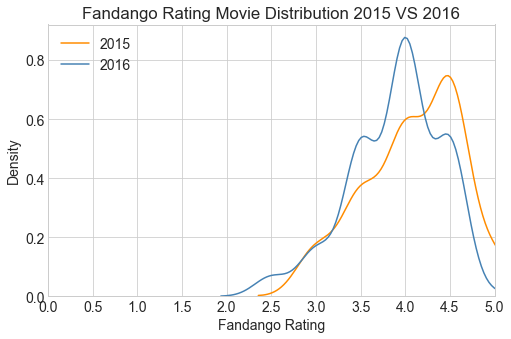

In [18]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(fandango_2015['Fandango_Stars'],
            label='2015',
            color='darkorange')
sns.kdeplot(fandango_2016['fandango'],
            label='2016',
            color='steelblue')
ax.set(title='Fandango Rating Movie Distribution 2015 VS 2016', 
       ylabel='Density',
       xlabel='Fandango Rating',
       xlim=(0,5),
       xticks=np.arange(0,5.1,0.5))

The shapes of the two kernel density plots are similar in that they are both skewed to the left. The ratings from 2015 seem to peak at a higher Fandango Rating at 4.5, whereas the ratings from 2016 peaks at 4.0. We can see that movie ratings in 2016 did indeed decrease from 2015 after Hickey's analysis.

We will now move on to look at the frequency distribution of each ratings in the two datasets. We will normalize the proportions since there are two different amounts of movies.

In [10]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [11]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

This supports the observation we saw from the KDE plots. 2016 movies were generally rated lower than 2015 movies. Some specifics to note are:
* 2016 movies have some 2.5 star movies whereas 2015 movies have 3 stars as the lowest amount of stars
* Highest frequency for 2016 movies were 4.0 whereas 2015 movies have 4.5 as the highest frequency

In [12]:
#creating a dataframe
data = {
    '2015': [fandango_2015['Fandango_Stars'].mean(),
             fandango_2015['Fandango_Stars'].median(),
             fandango_2015['Fandango_Stars'].mode()[0]],
    '2016': [fandango_2016['fandango'].mean(),
             fandango_2016['fandango'].median(),
             fandango_2016['fandango'].mode()[0]]
}

df = pd.DataFrame(data=data)
df.index = ['Mean', 'Median', 'Mode']
df.head()

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


[(0, 5), (-0.5, 2.5), Text(0.5,1,'Mean Median Mode for 2015 and 2016 Movies')]

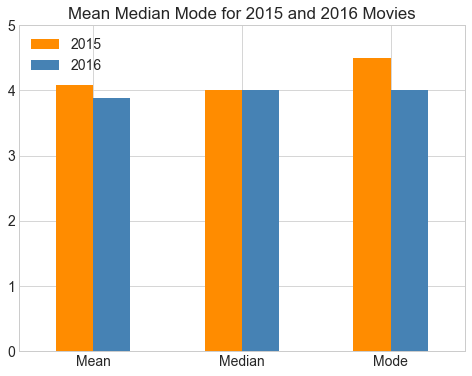

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
df['2015'].plot.bar(width=0.25, ax=ax, position=1, rot=0, color='darkorange',
                    label='2015')
df['2016'].plot.bar(width=0.25, ax=ax, position=0,
                    rot=0, color='steelblue', label='2016')
plt.legend(loc='upper left')
ax.set(xlim=(-0.5,2.5), 
       ylim=(0,5),
       title='Mean Median Mode for 2015 and 2016 Movies')

The differences we see between mean and mode from the graph above confirms our observation we made from the KDE plot. While median is equal for both 2015 and 2016 movies, both mean and mode were slightly higher by roughly 0.2 0.5 respectively for the 2015 movies. Therefore, we can confirm that 2016 movies were generally rated slightly lower than the 2015 movies.

This suggests that Fandango did change how their movies are ranked since the release of Hickey's analysis. Note that although 2016 movies are generally ranked lower than the 2015 movies, the difference has been slight and the overall pattern of movie ratings - skewed to the left - is still present.